In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Analytics Projekt – Red Wine Quality Datensatz


* [1. Allgemeine Informationen](#section-one)
* [2. Geschäftsverständnis](#section-two)
* [3. Datenverständnis](#section-three)
    - [3.1 Beschreibung des Datensatzes](#subsection-threeone)
    - [3.2 Datenvisualisierung](#subsection-threetwo)
* [4. Datenaufbereitung](#section-four)
    - [4.1 Auswahl der Features](#subsection-fourone)
    - [4.2 Umwandlung in ein Klassifikationsproblem](#subsection-fourtwo)
    - [4.3 Aufteilung der Daten](#subsection-fourthree)
* [5. Modellbildung](#section-five)
    - [5.1 Entscheidungsbaum](#subsection-fiveone)
    - [5.2 Random Forest Classifier](#subsection-fivetwo)
    - [5.3 Gradient Boost](#subsection-fivethree)
    - [5.4 XGBoost](#subsection-fivefour)
* [6. Modellevaluierung](#section-six)
    - [6.1 Konfusionsmatrix](#subsection-sixone)
    - [6.2 Wichtigkeit der Features: Random Forest Modell](#subsection-sixtwo)
    - [6.3 Feature-Auswertung: XGBoost](#subsection-sixthree)
* [7. Möglicher Geschäftseinsatz](#section-seven)
* [Quellen](#section-eight)

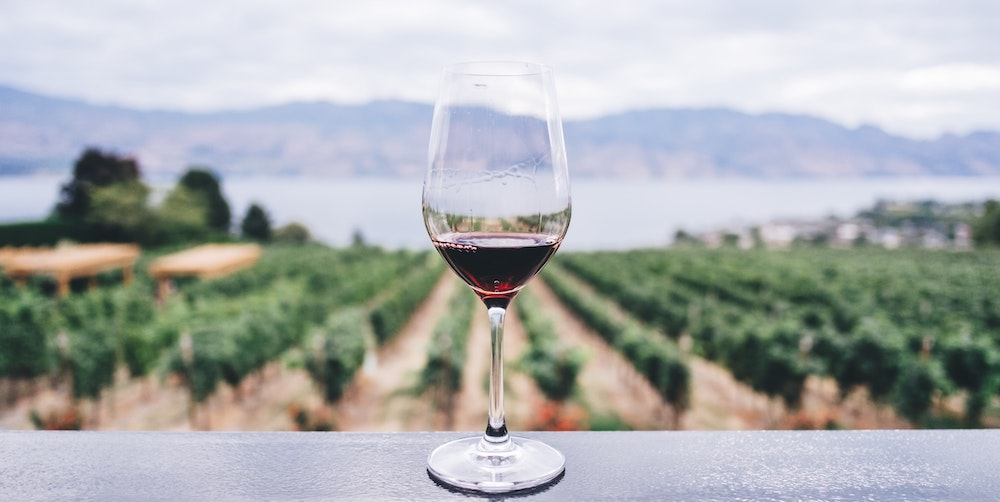

*Quelle: Unsplash von Kym Ellis, online: https://unsplash.com/photos/aF1NPSnDQLw (Abruf: 15.07.2020)*

<a id="section-one"></a>
## 1. Allgemeine Informationen
Projektteilnehmerinnen: Lara Baumgartl, Charlotte Schäfer, Anna Hämmerle

Verwendeter Datensatz: Red Wine Quality

In [ ]:
red_wine_quality = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

<a id="section-two"></a>
## 2. Geschäftsverständnis
Der portugiesische Wein *Vinho Verde* wird mit einem besonderen Geschmack und einer hohen Qualität verbunden. Eine rote und eine weiße Sorte des *Vinho Verde* werden auf einem Landgut in Nord-Portugal angebaut und sollen weltweit verkauft werden. Um die Weine an internationale Händler zu verkaufen, müssen sie eine Mindestqualität aufweisen, die den hohen Preis rechtfertigt. Um die Kunden zufrieden zu stellen und sich durch hohe Qualität international einen Namen zu machen, ist es das Ziel des Unternehmens, herauszufinden, welche physikochemischen Merkmale der Weinsorten die meisten Informationen über die Weinqualität liefern. Deshalb soll mithilfe von Machine Learning festgestellt werden, ob und inwieweit die Weinqualität durch bestimmte Merkmale beeinflusst wird und wie man die Qualität anhand dieser Merkmale vorhersagen kann.

Das Unternehmen hat zu diesem Zweck eine Gruppe von Analystinnen beauftragt, um ein Machine Learning Modell zu entwickeln, die den Zusammenhang der Merkmale eines Weins mit der Qualität analysiert. Es soll geprüft werden, welche dieser Merkmale die Qualität eines Weins erfolgreich voraussagen können.




### Bibliotheken

Hier befinden sich die Bibliotheken, die wir nutzen werden, um eine Lösung für unser Problem zu entwickeln.

* numpy | pandas: Hilft uns, die Daten zu behandeln.
* matplotlib | seaborn: Hilft uns, die Daten zu bearbeiten. Somit können wir die Informationen plotten, damit wir sie auf verschiedene Weise visualisieren und besser verstehen können.
* sklearn: Hilft uns, zu lernen. Dadurch haben wir alle notwendigen Werkzeuge, um unsere Modelle zu trainieren und anschließend zu testen. 
* math: Stellt einige Funktionen zur Verfügung, die wir eventuell beim Testen unserer Modelle verwenden möchten (sqrt).

In [ ]:
# Bibliotheken, die wir nutzen
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
import xgboost as xgb
from math import sqrt
from prettytable import PrettyTable
import plotly.express as px
import seaborn as sns

<a id="section-three"></a>
## 3. Datenverständnis
<a id="subsection-threeone"></a>
### 3.1 Beschreibung des Datensatzes
Bevor die Klassifikation der Daten durchgeführt wird, wird zunächst die Struktur des Datensatzes betrachtet.

In [ ]:
# Anzeigen des Datensatzes
red_wine_quality

In [ ]:
# Bestimmung der Form
red_wine_quality.shape

In [ ]:
# Untersuchung der Datentypen
red_wine_quality.info()

Der vorliegende Datensatz besteht aus 1599 Werten, 11 kontinuierlichen Merkmalen (folgend als Features bezeichnet) und einem kategorischen Feature (Qualität). Da herausgefunden werden soll, wie sich die physikochemisch Features auf die Qualität auswirken, wurde die kategorische Variable *Qualität* als Zielvariable festgelegt.

In [ ]:
# Untersuchung der Missing Values
red_wine_quality.isnull().sum()

Der Datensatz ist vollständig, das heißt es gibt keine fehlenden Werte (Nullwerte). Daher muss er nicht weiter bereinigt werden.

In [ ]:
# Anzeigen der Header
red_wine_quality.head(10)

Bei den oben angezeigten Headern handelt es sich um die Features, welche im Folgenden definiert werden:

1. **Fixed acidity** (fester Säuregehalt): die meisten Säuren, die im Wein vorhanden sind oder fest beziehungsweise nicht flüchtig sind (sie verdunsten nicht leicht).

2. **Volatile acidity** (flüchtige Säure): die Menge an Säure im Wein, die bei zu hohem Gehalt zu einem unangenehmen Essiggeschmack führen kann.

3. **Citric acid** (Zitronensäure): In kleinen Mengen kann Zitronensäure Weinen "Frische" und Geschmack verleihen.

4. **Residual sugar** (Restzucker): die Menge an Zucker, die nach der Gärung übrigbleibt. Selten findet man Weine mit weniger als 1 Gramm/Liter und Weine mit mehr als 45 Gramm/Liter gelten als süß.

5. **Chlorides** (Chloride): die Menge an Salz im Wein.

6. **Free sulfur dioxide** (freies Schwefeldioxid): Schwefeldioxid verhindert das mikrobielle Wachstum und die Oxidation von Wein.

7. **Total sulfur dioxide** (Gesamtschwefeldioxid): Menge an freien und gebundenen Formen von Schwefeldioxid. In niedrigen Konzentrationen ist Schwefeldioxid im Wein meist nicht nachweisbar.

8. **Density** (Dichte): die Dichte von Wein liegt nahe an der von Wasser, abhängig vom prozentualen Alkohol- und Zuckergehalt.

9. **pH** (pH-Wert): beschreibt, wie sauer oder basisch ein Wein auf einer Skala von 0 (sehr sauer) bis 14 (sehr basisch) ist; die meisten Weine liegen zwischen 3-4 auf der pH-Skala.

10. **Sulphates** (Sulfate): ein Weinzusatzstoff, der zum Gehalt an Schwefeldioxid beitragen kann, das als antimikrobielles und antioxidatives Mittel wirkt.

11. **Alcohol** (Alkohol): der prozentuale Alkoholgehalt des Weins.

12. **Quality** (Qualität): Zielvariable (basierend auf sensorischen Daten, Punktzahl zwischen 0 und 10).

(vgl. Alekseeva, 2020)

<a id="subsection-threetwo"></a>
### 3.2 Datenvisualisierung 
#### Verteilung der Qualitätsausprägung

Um besser einschätzen zu können, wie die Weine des Datensatzes bewertet wurden, wird die Verteilung der Qualitätsausprägung als Histogramm dargestellt.

In [ ]:
red_wine_quality['quality'].plot(kind = 'hist')
plt.xlabel('Qualität')
plt.show()

Die Ausprägung der Variablen *Qualität* wurde kategorisch auf einer Skala von 0-10 bewertet. Es ist zu erkennen, dass Werte von 0-2 als auch von 9-10 bei der Qualitätsausprägung nicht vorhanden sind.

#### Boxplots der kontinuierlichen Features

In [ ]:
sns.boxplot(x="quality",y="total sulfur dioxide",data=red_wine_quality, color='red')
plt.title("Boxplot zur Qualität und Gesamtschwefeldioxid")
plt.show()

Nachdem wir nun Informationen über unsere Zielvariable erhalten haben, werden wir die Korrelation zwischen Qualität und anderen Features untersuchen, um zu sehen, welche davon eine wichtige Rolle bei der Entscheidung über die Qualität eines Weins spielen.

<a id="section-four"></a>
## 4. Datenaufbereitung

* Haben sie neue Features abgeleitet?
* Wie sind sie mit fehlenden Daten umgegangen?
* Wie und warum haben Sie die Daten transformiert?
* Wie haben sie die Daten aufgeteilt? (Ein Split in Test- und Trainingsdaten ist erforderlich. Für die Optimierung der Parameter kann auch eine Kreuzevaluation bzw. ein Validationsset genutzt werden (Train-,Validation-, Test-Set).)

<a id="subsection-fourone"></a>
### 4.1 Auswahl der Features

In [ ]:
#Korrelationen berechnen und sortieren 
correlations = red_wine_quality.corr()['quality'].sort_values(ascending=False)
print(correlations)

In [ ]:
correlations.plot(kind='bar')

Die Korrelationen wurden betrachtet, um ein besseres Verständnis über die Zusammenhänge zwischen den kontinuierlichen Features und der Zielvariable zu bekommen. Um die Stärke der Korrelationen besser einschätzen zu können, wird im Folgenden eine Korrelationsmatrix betrachtet. Anhand dieser können gegebenenfalls Features ausgeschlossen werden. 

In [ ]:
#Erstellung einer Korrelationsmatrix, um die Korrelationen zwischen den Features abzubilden
plt.figure(figsize=(15,6))
sns.heatmap(red_wine_quality.corr(), annot=True, fmt = '.0%')

Aus dieser Matrix können wir offensichtliche Feature-Korrelationen beobachten. Darüber hinaus erhalten wir den Prozentsatz der Stärke der Korrelationen, die wir bereits vorher für die Qualität berechnet haben. Es ist auffällig, dass etwa die Hälfte der Features positiv mit der Qualität korreliert, während die andere Hälfte negativ korreliert.
Features, die mit der Qualität mit einem absoluten Wert von 0,2 oder größer korrelieren, geben erste Hinweise darauf, welche Features eine Vorhersage über die Qualität eines Weines geben könnten. Zu diesen zählen *volatile acidity*, *citric acid*, *sulphates*, und *alcohol*. Diese Korrelationen werden im Folgenden weiter überprüft.

In [ ]:
#Zeige Korrelationen, die größer als 0.2 sind
print(abs(correlations) > 0.2)

Die obige Darstellung bestätigt erneut die Ergebnisse der Korrelationsmatrix. Es korrelieren relativ stark mit Qualität: *alcohol*, *sulphates*, *citric acid* und *volatile acidity*.

<a id="subsection-fourtwo"></a>
### 4.2 Umwandlung in ein Klassifikationsproblem

Um die Effizienz der verschiedenen Klassifikationstechniken miteinander zu vergleichen, wird der Score (0-10) der Qualität in einen binären Score umgewandelt. 
Dafür werden alle Weine, die eine Qualität von 7 oder besser aufweisen, als "good quality" definiert. Alle Weine, mit einem Ergebnis von weniger als 7, wurden als "bad quality" definiert.
Der Beschreibung des Datensatzes zufolge, soll der Trennwert bei einer Klassifikation der Qualitätsvariable auf 6.5 gelegt werden. Da Qualität aber eine kategorische Variable ist, wird auf 7 aufgerundet. Durch die Aufrundung wird gewährleistet, dass nur Weine mit höchster Qualität betrachtet werden.


In [ ]:
#Target Variable 'quality' in eine binäre Variable teilen
red_wine_quality['goodquality'] = [1 if x >= 7 else 0 for x in red_wine_quality['quality']]

#Aufteilen in Feature Variable und Zielvariable
X = red_wine_quality.drop(['quality', 'goodquality'], axis = 1)
y = red_wine_quality['goodquality']

In [ ]:
#Verhältnis der Ausprägungen von guten und schlechten Weinen
red_wine_quality['goodquality'].value_counts()

Da es das Ziel ist, die Features herauszustellen, die eine gute Qualität an Wein vorhersagt, wird bei der weiteren Analyse mit einer Anzahl von 217 Weinen mit guter Qualität ein Train Test Split durchgeführt.

<a id="subsection-fourthree"></a>
### 4.3 Aufteilung der Daten

Die Daten werden standadisiert, die Auswirkung von Außreißern zu minimieren.

In [ ]:
#Standardisieren der Features
X_features = X
X = StandardScaler().fit_transform(X)

Split in Test- und Trainingsdaten. Für die Optimierung der Parameter kann auch eine Kreuzevaluation bzw. ein Validationsset genutzt werden (Train-,Validation-, Test-Set).

In [ ]:
#Aufteilen der Daten in Trainings- und Test-Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

<a id="section-five"></a>
# 5. Modellbildung
• Welche Machine Learning-Modelle haben Sie verwendet und warum?

• **Wie haben Sie die Parameter Ihres Data-Mining-Modells angepasst und
warum?**

• **Was sind die resultierenden Modelle?**

• Ein Plus ist, wenn Sie mehr als ein Machine Learning -Modell erstellen.

• Ein weiteres Plus ist die verständliche Beschreibung der eingesetzten Machine
Learning-Modellarten

Es werden im Folgenden vier verschiedene Machine Learning Modelle miteinander verglichen

Folgende Modelle werden genauer betrachtet:

* Entscheidungsbaum: Dieses Modell wird betrachtet, da dadurch eine Aussage getroffen werden kann wie wahrscheilich die Vorhersage getroffen werden kann.
* Random Forests: Aufbauend auf dem Entscheidungsbaum, wird das...
* KNN Klassifikation: Da...

<a id="subsection-fiveone"></a>
### 5.1 Entscheidungsbaum
Der Entscheidungsbaum wird vom Wurzleknoten abwärts betrachtet. In jedem Knoten wird dabei eine Attribut/Feature abgefragt. Die Entscheidung jedes Knotens führt dabei zu einem nächsten Knoten mit dem nächsten Attribut. Wird ein Blatt, also die tiefste Ebene des Entscheidungsbaums, schließlich erreicht, ergibts sich der Klassifizierungsfall (vgl. Rocketloop, 2019).
Durch einen Entscheidungsbaum kann die die Wahrscheinlichkeit der Zugehörigkeit zu einer Kategorie für einen Datenpunkt geschätzt werden. Für jeden Datenpunkt wird der Baum abgeschritten, um zu dem entsprechenden Blatt des Entscheidungsbaumes zu gelangen. Ein Entscheidungsbaum wird sich oft selbst überlassen bei der Auswertung. Daher passt er sich oft genau den Trainingsdaten an und neigt somit zu overfitting (vgl. Géron 2017).
Der Entscheidungsbaum ist eines der einfacheren Klassifizierungsmodelle. Er ist leicht nachvollziehbar und visualisierbar. Außerdem werden einige andere Klassifizierungsmodelle auf diesem aufgebaut.

In [ ]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

Mit dem Entscheidungsbaum wird eine F1-Wert von 0.89 erzeugt. Das heißt...

<a id="subsection-fivetwo"></a>
### 5.2 Random Forest Classifier
Die Random Forest Methode ist ein Algorithmus und kann für Klassifizierungs- und Regressionsaufgaben genutzt werden. Dabei werden die Ergebnisse aus vielen verschiedenen Entscheidungsbäumen kombiniert, um eine bestmögliche Entscheidung zu treffen. Der Random Forest Algorithmus kann im Machine Learning eingesetzt werden und gehört zum Supervised Learning. Wir haben den Random Forest Algorithmus aufbauend auf den Entscheidungsbaum für den vorliegenden Datensatz genutzt, da das Verfahren relativ einfach ist und die Trainingszeiten kurz sind (vgl. Luber & Litzel 2020).

In [ ]:
#Durchführen des RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

<a id="subsection-fivethree"></a>
### 5.3 Gradient Boost
Gradient Boosting ist eine Machine Learning Technik für Regressions- und Klassifikationsprobleme um Vorhersagemodelle zu entwickeln. Grundsätzlich besteht die Idee des Boostings darin, durch die Kombination vieler schwacher Classifier einen starken Classifier zu bilden. Das Boosting funktioniert dabei sequentiell. In jeder Iteration werden Informationen aus dem vorhergehenden Baum benutzt, damit die Rate der Fehlklassifizierung Stück für Stück verringert werden kann. Dabei werden die falsch klassifizierten Beobachtungen im nachfolgenden Baum höher gewichtet (vgl. Westermeyer 2019). Das Gradient boosting wurde für den vorliegenden Datensatz verwendet, da es ein praktisches Verfahren ist, um Vorhersage-Algorithmen zu entwickeln. In diesem Fall soll anhand der Ausprägung verschiedener Features die Qualität eines Weines vorausgesagt werden können. Im Vergleich zu anderen Machine Learning Modellen liefert das Boosting außerdem genauere Ergebnisse (vgl. DeepAI o.D.).

In [ ]:
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

<a id="subsection-fivefour"></a>
### 5.4 XGBoost
XGBoost steht für extremes Gradient Boosting (vgl. Luber/Litzel, 2019). Dabei handelt es sich um eine Software-Bibliothek für Supervised Learning mit dem Entscheidungsbaum-Algorithmus mit dem Gradient Boosting. Der XGBoost ist somit eine Erweiterung des Gradient Boostings und hat eine Effizienzsteigerung bei sehr großen Datensätzen zur Folge. Darüber hinaus wird im Vergleich zum Gradient Boosting mehr Regularisierung verwendet, um Overfitting zu vermeiden. Bei diesem Verfahren werden die Zielvariablen genauer ermittelt, indem mehrere einfachere und schwächere Modelle miteinander verknüpft und Schätzungen getroffen werden (vgl. Westermeyer, 2019). Für den vorliegenden Datensatz wurde zusätzlich zum Boosting ein XGBoost angewendet, da der Datensatz relativ groß ist und Overfitting auf ein Minimum reduziert werden soll.

In [ ]:
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

Beim Vergleichen der Modelle ist zu erkennen, dass die Random Forest Methode und die XGBoost Methode die genauseten Ergebnisse lieferen. Beide Modelle liefern genau den selben F1-Wertn über den gesamten Datensatz, aber der XGBoost liefert eine genauere Vorhersage für Wein mit guter Qualität (1).

<a id="section-six"></a>
# 6. Modellevaluierung
• Bewertung der ausgewählten Modelle: Wie werden Ihre Modelle in der Praxis
funktionieren?

• Haben Sie verschiedene Modelle verglichen? Wenn ja, welches ist besser? Für
welche Metrik?
*Wir haben verschidene Machine Learning Methoden angewand und diese miteinander verglichen. In diesem Datensatz werden außer der Qualität nur kontinuierlich skalierte Features betrachtet. Für die Qualität haben wir den XGBoost als akkurateste Mehtode identifizieren können.*

• Versuchen Sie ein Modell und Parameter mit einer hohen Genauigkeit im
Testsatz zu finden.
*Das genauste Modell in diesem Fall ist der XGBoost, gefolgt von dem Random Forest Classifier

• Beschreibung der gewählten Vorgehensweise zur Optimierung der Parameter

• Diskussion der Evaluationsergebnisse (z.B. sind falsch positiv und falsch
negativ Fehler gleich wichtig? Wie könnten Sie die unterschiedlichen Kosten
der Fehler ausgleichen?) --> **Konfusionsmatrix**

<a id="subsection-sixone"></a>
### 6.1 Konfusionsmatrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.predict_proba(X_test)[:,1]

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=['bad', 'good'])
cmd.plot()

<a id="subsection-sixtwo"></a>
### 6.2 Wichtigkeit der Features: Random Forest Modell
Die wichtigkeit der Features wird nun zuerst basierend auf dem  Random Forest Modell grafisch dargestellt.

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<a id="subsection-sixthree"></a>
### 6.3 Feature-Auswertung: XGBoost 
Die wichtigkeit der Features wird nun nun basierend auf dem  XGBoost Modell grafisch dargestellt.

In [ ]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

![](http://)Vergleicht man die Zwei Modelle miteinander, fällt auf, dass die Werte leicht variieren, die Top-3 Features jedoch die gleichen sind. Nämlich: aclcohol, volatile acidity, sulphates.

In [ ]:
# Filtering df for only good quality
red_wine_quality_temp = red_wine_quality[red_wine_quality['goodquality']==1]
red_wine_quality_temp.describe()

In [ ]:
# Filtering df for only bad quality
red_wine_quality_temp2 = red_wine_quality[red_wine_quality['goodquality']==0]
red_wine_quality_temp2.describe()

Wenn wir uns die Details ansehen, können wir feststellen, dass gute Qualitätsweine im Durchschnitt einen höheren Alkoholgehalt, einen niedrigeren Gehalt an flüchtiger Säure, einen höheren Sulfatgehalt und einen niedrigeren flüchtigen Säuregehalt aufweisen.

<a id="section-seven"></a>
# 7. Möglicher Geschäftseinsatz
Zur Erinnerung: Es sollte geprüft werden, welche der Attribute die Qualität eines Weins erfolgreich voraussagen können. Das Ergebnis der Analyse zeigt, dass sowohl der Random Forest Classifier als auch der XGBoost Resultate erbracht haben, die die Vorhersage der Qualität eines Weines nach physikochemischen Attributen ermöglichen. Durch die Attribute Alkoholgehalt, Sulfatgehalt und flüchtigen Säuregehalt, kann die Qualität eines Weines vorab eingeschätzt werden.

 • Was ist die Bedeutung Ihres Modells und Ihrer Lösung aus der Geschäftsperspektive?

Das Vinho Verde Weingeschäft der portugiesischen Familie hat das Potenzial, große Umsätze zu erzielen. Damit das gelingt, sollten Technologien wie die oben erarbeiteten Machine Learning Algorithmen eingesetzt werden, um Vorhersagen zur Qualität des Weines zu treffen, das Geschäftsmodell auf die nächste Stufe zu heben und somit der Konkurrenz immer einen Schritt voraus zu sein. So kann beispielsweise schon beim Anbau und der Verarbeitung des Weins Fokus auf die wichtigsten Features gelegt werden, die die Qualität des Weins positiv beeinflussen. Das sind z.B. der Alkoholgehalt, der Sulfatgehalt und der Gehalt flüchtigen Säure. Außerdem hilft Dataanalytics den Geschäftsführern und Managern des Unternehmens, das Geschäft im Detail zu verstehen, die Strategie auf der Basis von Daten zu verändern und Entscheidungen mit Hilfe eines datengestützten Ansatzes zu treffen. Z.B. kann ein großes Produktportfolio mit verschiedenen Weinen mit verschiedenen Qualitätsausprägungen zu unterschiedlichen Preisen aufgestellt werden, um alle Zielgruppe zu bedienen.
 
Eine Limitation der durchgeführten Analyse ist, dass der verwendete Datensatz ausschließlich aus Proben aus einer spezifischen Region in Portugal besteht. In der Zukunft wäre es sinnvoll, den Datensatz um verschiedene Länder und Regionen zu erweitern, in denen Wein angebaut wir, um regionsbedingte Verzerrungen auszuschließen.


<a id="section-eight"></a>
# Quellen

**Alekseeva, Daria (2020):** Red and White Wine Quality, online: https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html (Abruf: 28.06.2020)

**UCI Machine Learning (2009):** Red Wine Quality, online: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 (Abruf: 25.06.2020)